In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from tqdm import tqdm_notebook

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [2]:
def summary(df) :
    pd.set_option('display.max_rows', 100)
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes, 
                        '비 결측치 수(notnull' : df.notnull().sum(),
                        '결측치 수(null)' : df.isnull().sum(), 
                        '고유값 수(nunique)' : df.nunique()})
    return tf

In [4]:
import glob
files = glob.glob('../data/기사리스트/*.*')
files

["../data/기사리스트\\'(잔류)농약'.xlsx",
 "../data/기사리스트\\'2-CE_2-클로로에탄올'.xlsx",
 "../data/기사리스트\\'AI'.xlsx",
 "../data/기사리스트\\'AI조류인플루엔자'.xlsx",
 "../data/기사리스트\\'BPA_BSE',.xlsx",
 "../data/기사리스트\\'BSE(광우병)'.xlsx",
 "../data/기사리스트\\'E.coli'.xlsx",
 "../data/기사리스트\\'GM (유전자변형)'.xlsx",
 "../data/기사리스트\\'GMO'.xlsx",
 "../data/기사리스트\\'건강기능식품'.xlsx",
 "../data/기사리스트\\'검사조사_검출'.xlsx",
 "../data/기사리스트\\'곰팡이_곰팡이독소'.xlsx",
 "../data/기사리스트\\'광우병'.xlsx",
 "../data/기사리스트\\'금지'.xlsx",
 "../data/기사리스트\\'급식'.xlsx",
 "../data/기사리스트\\'기생충'.xlsx",
 "../data/기사리스트\\'농산물'.xlsx",
 "../data/기사리스트\\'농식품부_농약'.xlsx",
 "../data/기사리스트\\'다이옥신_대장균_동물용의약품',.xlsx",
 "../data/기사리스트\\'리스테리아_먹는물'.xlsx",
 "../data/기사리스트\\'먹는물(생수)'.xlsx",
 "../data/기사리스트\\'발암'.xlsx",
 "../data/기사리스트\\'발암(물질)'.xlsx",
 "../data/기사리스트\\'방사능_방사성'.xlsx",
 "../data/기사리스트\\'부작용_살모넬라'.xlsx",
 "../data/기사리스트\\'사망'.xlsx",
 "../data/기사리스트\\'생수 세척제 수산물'.xlsx",
 "../data/기사리스트\\'수의약품'.xlsx",
 "../data/기사리스트\\'수의약품(동물용의약품)'.xlsx",
 "../data/기사리스트\\'식약처 식이요법 

## 주요 키워드로 수집한 기사 통합하기

In [5]:
col = ['일자', '언론사', '통합 분류1', '통합 분류2', '통합 분류3', '키워드', '특성추출(가중치순 상위 50개)', '본문']

data = pd.read_excel("../data/기사리스트\\'(잔류)농약'.xlsx", usecols = col)
data.shape
data.head()
summary(data)

In [5]:
np.array([len(i) for i in data['키워드']]).mean()
np.array([len(i) for i in data['특성추출(가중치순 상위 50개)']]).mean()

NameError: name 'data' is not defined

In [6]:
col_new = ['일자', '언론사', '통합 분류1', '통합 분류2', '통합 분류3', '키워드', '특성추출(가중치순 상위 50개)']

result = pd.concat([pd.read_excel(f, usecols = col) for f in files], ignore_index=True)
result['일자'] = pd.to_datetime(result['일자'].astype('str'))

In [7]:
result.shape

(697475, 8)

In [8]:
result = result[result.duplicated(subset=['일자', '언론사'], keep='first')]
result.shape

(627789, 8)

In [9]:
result.to_pickle('../data/result_subset_food.pkl')

# 요기서 부터

In [10]:
df = pd.read_pickle('../data/result_subset_food.pkl')
df.head()
df.shape

# 제목이 같은 항목 삭제 및 마지막 레코드만 남김
df = df.drop_duplicates(subset=['일자','언론사', '본문'], keep="last")
df.head()
df.shape

,일자,언론사,통합 분류1,통합 분류2,통합 분류3,키워드,특성추출(가중치순 상위 50개),본문
8,2022-02-28,아시아경제,지역>경남,지역>전북,지역>충남,"도심,도심,자연,힐링,중랑구,도시,농업,복합,공간,착공,서울시,자치구,중랑구,30억...","도시농업,중랑구,강서구,중랑천,체험장,서울시,오곡텃밭농장,청남공원,친환경,구청장,도...",[아시아경제 박종일 기자] 중랑구(구청장 류경기)가 지난 25일 청남공원 내에 도시...
44,2022-02-23,대전일보,지역>전북,지역>충북,지역>충남,"서산시,농산물,잔류,농약,연중,무료,가지,4월,가지,지원,서산,충남,서산시,수요,안...","농산물,서산시,농업인,농업환경분석센터,김갑식,농작물,분석의뢰서,재배지,액비,의뢰서,...",[서산]충남 서산시가 높아지는 안전 농산물 수요에 발맞춰 농산물 잔류농약 분석을 무...
52,2022-02-23,충청일보,지역>전북,지역>충북,지역>대전,"서산시,농산물,잔류농약,잔류,농약,연중,무료,지역,농산물,확보주,320가지,가지,충...","농산물,서산시,320가지,잔류농약,농업인,충남,농업환경분석센터,김갑식,확보주,분석의...","믿고 먹을 수 있는 지역 농산물 확보주 5일, 320가지 분석 충남 서산시가 높아..."
55,2022-02-23,부산일보,경제>무역,경제>유통,경제>자동차,"팬데믹,수출,진주시,농산물,역대,최고,해외,달러,어치,신선,농산물,전년,19%,증가...","농산물,신선농산물,진주시,신선,일본,진주,팬데믹,478ha,태국,베트남,파프리카,지역산",진주 수출용 딸기 선별과 포장 모습. 진주시 제공\n\n\n\n 코로나19 팬데믹 ...
61,2022-02-22,대전일보,지역>충남,경제>유통,지역>전북,"청양,푸드,플랜,먹거리위원회,제도적,마련,소비시장,창출,논의,청양,청양군,지속,가능...","100억,청양,먹거리위원회,농산물,위원회,푸드플랜,대한민국,납품처,대치면,만큼,소비...",[청양]청양군이 지속 가능한 먹거리 생산유통체계 구성을 위해 먹거리 위원회를 구성하...


(627789, 8)

,일자,언론사,통합 분류1,통합 분류2,통합 분류3,키워드,특성추출(가중치순 상위 50개),본문
8674,2020-03-20,중도일보,경제>자원,경제>유통,지역>경남,"순수,국산,수매,밀가루,시범,판매,농산물,면역,증진,효과,노화,억제,한국농수산식품유...","시범판매,밀가루,농산물,밀산업,자급률,병해충,소비자,육성법,소비량,신규제품,16톤,...","한국농수산식품유통공사(aT, 사장 이병호)는 지난해 수매한 국산 밀가루 16톤을 오..."
8675,2020-03-20,중도일보,지역>전북,지역>전남,지역>강원,"물고기,채소농사,고창군,아쿠아포닉스,채소,전국,출하,아쿠아포닉스,농법,착공,시설,출...","아쿠아포닉스,고창군,고창군청,지원사업,이영성,아쿠아포닉스코리아,재배법,수경재배,환경...",전북 고창군의 한 농장이 물고기 양식장에서 나온 유기물로 작물을 재배하는 '아쿠아포...
8678,2020-03-20,전북도민일보,지역>충북,지역>대전,지역>전북,"남부안농협,토양,개량제,무상,지원,남부안농협,조합장,최우식,로컬,푸드,농산물,생산,...","남부안농협,로컬푸드,토양개량제,직매장,농산물,고품질,무상지원,농가소득,732포,최우...",남부안농협(조합장 최우식)은 로컬푸드 고품질 농산물 생산을 위한 토양개량 지원사업...
8687,2020-03-20,충청투데이,경제>유통,경제>자원,NaN,"취나물,부여,백마강,부여군농업기술센터,남면,지역,백마강,취나물,출하,본격적,시작,1...","면역력,백마강,부여군,관계자,부여군농업기술센터,병해충,클로로젠산,농약허용물질목록관리...",[충청투데이 김일순 기자] 부여군농업기술센터는 남면 지역에서 고품질 백마강 취나물 ...
8689,2020-03-19,대전일보,지역>경기,지역>충남,경제>자원,"보령시,공모,타작물,생산,장비,지원,사업,보령,보령시,타작물,재배,확산,타작물,재배...","타작물,보령시,농업인,간척지,ha,연명부,소재지,기반정비,선별기,방제기,수확기,농기...",[보령] 보령시는 논 타작물 재배 확산을 위해 타작물 재배에 필요한 기반정비 및 생...


(452205, 8)

In [12]:
df = df.dropna(subset=['특성추출(가중치순 상위 50개)'], axis=0)

df['일자'].max()
df['일자'].min()
df.shape

Timestamp('2022-02-28 00:00:00')

Timestamp('2017-01-01 00:00:00')

(452203, 8)

In [13]:
len(df['키워드'].unique())
len(df['특성추출(가중치순 상위 50개)'].unique())

450118

449498

In [14]:
df.head()

,일자,언론사,통합 분류1,통합 분류2,통합 분류3,키워드,특성추출(가중치순 상위 50개),본문
8674,2020-03-20,중도일보,경제>자원,경제>유통,지역>경남,"순수,국산,수매,밀가루,시범,판매,농산물,면역,증진,효과,노화,억제,한국농수산식품유...","시범판매,밀가루,농산물,밀산업,자급률,병해충,소비자,육성법,소비량,신규제품,16톤,...","한국농수산식품유통공사(aT, 사장 이병호)는 지난해 수매한 국산 밀가루 16톤을 오..."
8675,2020-03-20,중도일보,지역>전북,지역>전남,지역>강원,"물고기,채소농사,고창군,아쿠아포닉스,채소,전국,출하,아쿠아포닉스,농법,착공,시설,출...","아쿠아포닉스,고창군,고창군청,지원사업,이영성,아쿠아포닉스코리아,재배법,수경재배,환경...",전북 고창군의 한 농장이 물고기 양식장에서 나온 유기물로 작물을 재배하는 '아쿠아포...
8678,2020-03-20,전북도민일보,지역>충북,지역>대전,지역>전북,"남부안농협,토양,개량제,무상,지원,남부안농협,조합장,최우식,로컬,푸드,농산물,생산,...","남부안농협,로컬푸드,토양개량제,직매장,농산물,고품질,무상지원,농가소득,732포,최우...",남부안농협(조합장 최우식)은 로컬푸드 고품질 농산물 생산을 위한 토양개량 지원사업...
8687,2020-03-20,충청투데이,경제>유통,경제>자원,NaN,"취나물,부여,백마강,부여군농업기술센터,남면,지역,백마강,취나물,출하,본격적,시작,1...","면역력,백마강,부여군,관계자,부여군농업기술센터,병해충,클로로젠산,농약허용물질목록관리...",[충청투데이 김일순 기자] 부여군농업기술센터는 남면 지역에서 고품질 백마강 취나물 ...
8689,2020-03-19,대전일보,지역>경기,지역>충남,경제>자원,"보령시,공모,타작물,생산,장비,지원,사업,보령,보령시,타작물,재배,확산,타작물,재배...","타작물,보령시,농업인,간척지,ha,연명부,소재지,기반정비,선별기,방제기,수확기,농기...",[보령] 보령시는 논 타작물 재배 확산을 위해 타작물 재배에 필요한 기반정비 및 생...


## 언론사 출처

<AxesSubplot:>

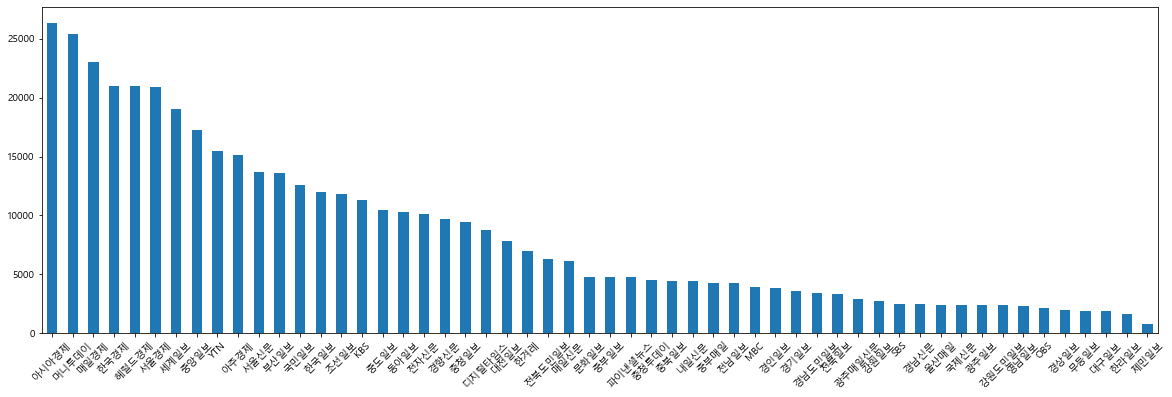

In [15]:
plt.rcParams["figure.figsize"] = (20,6)
df['언론사'].value_counts().plot(kind ='bar', rot=45)

## 데이터 컬럼 선택하여 축소

In [16]:
df = df.drop(['키워드', '본문'], axis=1)
df.shape
df

(452203, 6)

,일자,언론사,통합 분류1,통합 분류2,통합 분류3,특성추출(가중치순 상위 50개)
8674,2020-03-20,중도일보,경제>자원,경제>유통,지역>경남,"시범판매,밀가루,농산물,밀산업,자급률,병해충,소비자,육성법,소비량,신규제품,16톤,..."
8675,2020-03-20,중도일보,지역>전북,지역>전남,지역>강원,"아쿠아포닉스,고창군,고창군청,지원사업,이영성,아쿠아포닉스코리아,재배법,수경재배,환경..."
8678,2020-03-20,전북도민일보,지역>충북,지역>대전,지역>전북,"남부안농협,로컬푸드,토양개량제,직매장,농산물,고품질,무상지원,농가소득,732포,최우..."
8687,2020-03-20,충청투데이,경제>유통,경제>자원,NaN,"면역력,백마강,부여군,관계자,부여군농업기술센터,병해충,클로로젠산,농약허용물질목록관리..."
8689,2020-03-19,대전일보,지역>경기,지역>충남,경제>자원,"타작물,보령시,농업인,간척지,ha,연명부,소재지,기반정비,선별기,방제기,수확기,농기..."
...,...,...,...,...,...,...
697463,2017-01-02,아주경제,경제>유통,지역>강원,지역>울산,"원산지,수산물,신고전화,합동점검,소비자,경찰청,불법행위,제수용,유통행위,공무원,안전..."
697464,2017-01-02,MBC,경제>유통,경제>서비스_쇼핑,NaN,"원산지,범부처불량식품근절추진단,추진단,불법행위,식약처,위반행위,제조업체,식품,전국,..."
697466,2017-01-02,아주경제,사회>의료_건강,경제>유통,경제>무역,"의약품,식약처,안전관리,국민들,마약류,화장품,의료기기,우리나라,오남용,소비자,의료제..."
697467,2017-01-02,MBC,미분류,NaN,NaN,"제수용,원산지,보조금,정보공개,부정수급,경찰청,사제총기,보상금액,사업관리,추진단,안..."


In [13]:
corpus = []
for keywords in df['특성추출(가중치순 상위 50개)']:
    corpus.append(keywords)
corpus

['시범판매,밀가루,농산물,밀산업,자급률,병해충,소비자,육성법,소비량,신규제품,16톤,웰빙,농림축산식품부,로컬푸드,kg,발전대책',
 '아쿠아포닉스,고창군,고창군청,지원사업,이영성,아쿠아포닉스코리아,재배법,수경재배,환경오염,이영윤,미래농업,농어촌,화학비료,전라북도,물고기양식,융복합,농산물,소비자,유기물,무농약,합성어,식감,양식장,아쿠포닉스,농특산물,노지',
 '남부안농협,로컬푸드,토양개량제,직매장,농산물,고품질,무상지원,농가소득,732포,최우식,농협중앙회,화자재,개량제,저온탄화자재,활성화,농협구현,미세기공,농약사용,미생물,유효미생물,화학비료,저온탄화물질,토양속,소비자,농촌진흥청',
 '면역력,백마강,부여군,관계자,부여군농업기술센터,병해충,클로로젠산,농약허용물질목록관리제도,채소류,mg,햇취,최소화,시범사업,남면,현장기술지원팀,조리과정,묵은취,코로나19,항산,부여,pls,다년,취나물,재배',
 '타작물,보령시,농업인,간척지,ha,연명부,소재지,기반정비,선별기,방제기,수확기,농기자재,조사료,농기계,정식기,물꼬정비,정책과,대표자',
 '면역력,부여군,백마강,관계자,부여군농업기술센터,병해충,클로로젠산,농약허용물질목록관리제도,채소류,mg,정대영,햇취,조리과정,시범사업,최소화,현장기술지원팀,코로나19,묵은취,항산,부여,pls,다년,취나물,재배,물질,함량,해소,실증,출하,품질',
 '면역력,부여군,백마강,관계자,병해충,클로로젠산,남면,농약허용물질목록관리제도,채소류,mg,햇취,시범사업,최소화,현장기술지원팀,조리과정,묵은취,항산,코로나19,pls,다년,취나물,재배,물질,함량,해소,실증',
 '일주일,육묘상,완숙퇴비,농업기술센터,관계자,노지,활착,코로나19,병해충,고추재배,10a,영농지,사용법,농특산물,밑거름,청양,농산물,염화칼륨,인비,최소화',
 '수경재배,스마트팜,제천,전문가,제천시,경기도,경쟁력,노지,충북,6차,관계자,의림지,단기간,타임슬립',
 '타작물,농업인,간척지,농기계,ha,농기자재,연명부,소재지,보령시,지원금,수확기,조사료,선별기,정식기,대표자',
 '코로나19,육

In [18]:
len(corpus)
data = pd.read_excel('../data/출현단어_5만 _박태욱.xlsx')
stop_words_01 = data[data['선택'] == 0]['출현단어'].tolist()

stop_words = list(set(stop_words_01))

570265

### twitter 단어 추출이 필요없음

In [65]:
for i in df.언론사.value_counts().index :
    stop_words.append(i)
    
for i in ['미국', '국내', '한국', '대표', '중국','일본', '가격', '글로벌', '기업', '대상', '정부', '세계', '국회', '관심', '방송'] :
    stop_words.append(i)

for i in ['인사', '발령', '공개모집', '필기시험', '발령', '인사 발령', '과장', '전보', '일자', '공무원', '국장', '점검', '실시'] :
    stop_words.append(i)
    
common = ["전략", "연구", "평가", "마련", "조사", "관리", "보다", "관련","전문가","예정","이번", "환경", "기술", "사업", "산업", "기업","우리나라", "또한",
          "총회", "대한", "통해", "한국","국내","개최","행사","우수","장관","피해","해외","일자리","박람회", "지원", "위해", "총회","국제","분야","세계",
          "식품과학","국립","시민","통합", "정책", "대해", '선정', '아시아경제']
for i in common :
    stop_words.append(i)

for i in ['두고', '농협', '시행', '식품안전', '안전', '참여', '이상', '조치', '개선', '관내', '참석', '대전', '확산', '조성', '홍보'] :
    stop_words.append(i)
    
for i in ['대한민국', '홈페이지', '상반기', '시간date', '이명박', '박근혜', '청와대', '위원회',
          '그동안', '1만', '회용', '사람들', '앤서니', '이재명', '더불어민주당', '민주당',
         '봉준호', '시상식', '만큼','위원장', '관계자', '서울', '국민의힘', '윤석열', 'a씨', '식품의약품안전처', '식약처','소비자들', '농림축산식품부',
         '식품부', '농식품부']:
    stop_words.append(i)

len(list(set(stop_words)))
stop_words = list(set(stop_words))

45950

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

vect = CountVectorizer(stop_words = stop_words, ngram_range=(1, 1), min_df= 0.005, max_df= 0.8)  
X = vect.fit_transform(corpus) # Doc-Term Matrix 계산
X = TfidfTransformer().fit_transform(X)

count = X.toarray().sum(axis=0) # Doc-Term Matrix 각 단어에 대한 합
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]
keyword_list = list(zip(feature_name, count))
result_df = pd.DataFrame(keyword_list)

In [67]:
result_df

,0,1
0,온라인,25165.675810
1,소비자,20524.527614
2,농산물,15571.176430
3,의약품,14297.859863
4,수산물,7897.791590
5,안전성,6056.351783
6,소상공인,5949.285325
7,오염수,5593.832267
8,축산물,5475.369763
9,농업인,5153.831026


In [68]:
# 시작년도, 끝년도 지정
start_year = 2017
end_year = 2022

corpus = [""] * len(df)

result_df = pd.DataFrame()

# 녇도별 문서 추출 후 키워드 빈도수 분석

for year in tqdm_notebook(range(int(start_year),int(end_year)+1)):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    dt_index = (df['일자'] >= start_date) & (df['일자'] <= end_date)
    temp_df = df[dt_index]

    # twitter 단어 추출이 필요없음
    #for i, fn in enumerate(temp_df['특성추출(가중치순 상위 50개)']) :
    #    corpus[i] = " ".join(twitter.nouns(fn))
    
    corpus = []
    for keywords in temp_df['특성추출(가중치순 상위 50개)']:
        corpus.append(keywords)    
       
        
    vect = CountVectorizer(stop_words = stop_words, ngram_range=(1, 1), min_df= 0.005, max_df= 0.8)
    X = vect.fit_transform(corpus)
    X = TfidfTransformer().fit_transform(X)
        
    count = X.toarray().sum(axis=0)
    idx = np.argsort(-count)
    count = count[idx]

    feature_name = np.array(vect.get_feature_names())[idx]

    result = list(zip(feature_name, count))
    result = pd.DataFrame(result)
    result.columns=[str(year) + ' 키워드','빈도수']
    result_df = pd.concat([result_df,result],axis=1)
    
result_df.head(50)

  0%|          | 0/6 [00:00<?, ?it/s]

,2017 키워드,빈도수,2018 키워드,빈도수,2019 키워드,빈도수,2020 키워드,빈도수,2021 키워드,빈도수,2022 키워드,빈도수
0,소비자,1009.971235,소비자,2010.067484,소비자,2874.169517,온라인,5236.118867,온라인,14751.789528,온라인,5202.395698
1,중금속,862.216672,의약품,1321.532429,의약품,1740.385475,소비자,4430.607851,소비자,12530.412533,소비자,3551.158516
2,발암물질,650.335700,중금속,1080.076856,중금속,1533.234207,의약품,2982.118689,농산물,10436.953166,농산물,2409.157511
3,의약품,574.663351,발암물질,1066.838384,오염수,1212.746169,농산물,2768.560069,의약품,9521.800215,의약품,1912.179756
4,곰팡이,488.503060,건강기능식품,713.367108,온라인,1176.896201,축산물,2140.940861,수산물,5509.572837,소상공인,1778.117225
5,대장균,441.344288,곰팡이,709.838496,곰팡이,1029.088693,안전성,1578.641865,오염수,4388.556548,수산물,921.417363
6,첨가물,386.334367,온라인,633.321013,건강기능식품,978.953745,수산물,1518.093715,안전성,3738.253076,친환경,900.770819
7,유해물질,350.442315,첨가물,560.396296,농산물,926.615967,면역력,1404.048506,소상공인,3451.128918,농업인,898.118274
8,온라인,334.806829,대장균,531.177278,발암물질,799.523661,농업인,1342.409797,친환경,2963.742074,안전성,789.577618
9,안전성,302.646806,제품,515.731069,안전성,752.980705,대장균,1262.845137,음식점,2898.027338,음식점,650.410551


In [69]:
# 코로나 전후 지정, 1은 코로나 이후 0은 코로나 발생 이전

df['코로나전후'] = 1
df.loc[df['일자'] < '2020-01-20', '코로나전후'] = 0

corpus = [""] * len(df)

result_df = pd.DataFrame()

# 녇도별 문서 추출 후 키워드 빈도수 분석

for corona in tqdm_notebook(range(2)):
    
    temp_df = df[df['코로나전후'] == corona]
    
    corpus = []
    for keywords in temp_df['특성추출(가중치순 상위 50개)']:
        corpus.append(keywords)    
       
        
    vect = CountVectorizer(stop_words = stop_words, ngram_range=(1, 1), min_df= 0.005, max_df= 0.8)
    X = vect.fit_transform(corpus)
    X = TfidfTransformer().fit_transform(X)
        
    count = X.toarray().sum(axis=0)
    idx = np.argsort(-count)
    count = count[idx]

    feature_name = np.array(vect.get_feature_names())[idx]

    result = list(zip(feature_name, count))
    result = pd.DataFrame(result)
    result.columns=['코로나_' + str(corona) + ' 키워드', '빈도수']
    result_df = pd.concat([result_df,result],axis=1)

    
result_df.head(50)

  0%|          | 0/2 [00:00<?, ?it/s]

,코로나_0 키워드,빈도수,코로나_1 키워드,빈도수
0,소비자,6090.637252,온라인,25165.675810
1,의약품,3783.673904,소비자,20524.527614
2,중금속,3527.647852,농산물,15571.176430
3,발암물질,2569.917597,의약품,14297.859863
4,곰팡이,2305.504805,수산물,7897.791590
5,온라인,2237.793701,안전성,6056.351783
6,건강기능식품,1954.940537,소상공인,5949.285325
7,농산물,1749.522956,오염수,5593.832267
8,첨가물,1631.466093,축산물,5475.369763
9,대장균,1542.623882,농업인,5153.831026


In [82]:
data = result_df.fillna(0)
data.columns = ['코로나_0 키워드', '빈도수_0', '코로나_1 키워드', '빈도수_1']

In [83]:
len(set(data['코로나_0 키워드'].unique()) & set(data['코로나_1 키워드'].unique()))
set(data['코로나_0 키워드'].unique()) - set(data['코로나_1 키워드'].unique())
set(data['코로나_1 키워드'].unique()) - set(data['코로나_0 키워드'].unique())

27

{'bpa',
 'gmo',
 '가공식품',
 '건강관리',
 '건강식품',
 '냉장고',
 '돼지고기',
 '맥도날드',
 '발암물질',
 '불량식품',
 '생수',
 '섭취',
 '섭취량',
 '소고기',
 '식생활',
 '식습관',
 '영양소',
 '오염물질',
 '원재료',
 '유산균',
 '유통기한',
 '유해물질',
 '이물질',
 '정수기',
 '지방산',
 '지하수',
 '첨가물',
 '추출물',
 '포도상구균',
 '프로바이오틱스',
 '항산화',
 '호르몬',
 '화학물질',
 '화합물',
 '환경호르몬'}

{0, '농식품', '소상공인', '의약국'}

In [84]:
data_01 = data[['코로나_0 키워드', '빈도수_0']]
data_02 = data[['코로나_1 키워드', '빈도수_1']]

data = data_01.merge(data_02, left_on ='코로나_0 키워드', right_on ='코로나_1 키워드').drop('코로나_1 키워드', axis=1)
data['증감(%)'] = (data['빈도수_1'] - data['빈도수_0'])/data['빈도수_0']*100

,코로나_0 키워드,빈도수_0,빈도수_1,증감(%)
4,온라인,2237.793701,25165.675810,1024.575326
6,농산물,1749.522956,15571.176430,790.024128
23,음식점,540.788466,4168.085197,670.742252
16,수산물,1040.490529,7897.791590,659.045024
21,농업인,738.309933,5153.831026,598.057928
17,축산물,867.207482,5475.369763,531.379442
26,생산자,343.035401,2088.214574,508.746085
24,제약사,519.624615,3087.129610,494.107654
18,친환경,865.357267,4550.100644,425.806024
11,오염수,1339.765315,5593.832267,317.523293


In [95]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.float_format = "{:,.2f}".format
data.columns =['상위 랭킹 출현단어', '코로나전 빈도', '코로나후 빈도', '전후 증감율(%)']

data= data.sort_values('전후 증감율(%)', ascending=False)
data.index = np.arange(0, len(data))
data[0:14]
data[14:30]

,상위 랭킹 출현단어,코로나전 빈도,코로나후 빈도,전후 증감율(%)
0,온라인,"2,237.79","25,165.68","1,024.58"
1,농산물,"1,749.52","15,571.18",790.02
2,음식점,540.79,"4,168.09",670.74
3,수산물,"1,040.49","7,897.79",659.05
4,농업인,738.31,"5,153.83",598.06
5,축산물,867.21,"5,475.37",531.38
6,생산자,343.04,"2,088.21",508.75
7,제약사,519.62,"3,087.13",494.11
8,친환경,865.36,"4,550.10",425.81
9,오염수,"1,339.77","5,593.83",317.52


,상위 랭킹 출현단어,코로나전 빈도,코로나후 빈도,전후 증감율(%)
14,소비자,"6,090.64","20,524.53",236.98
15,식중독,812.08,"2,641.99",225.34
16,식품,"1,129.57","3,302.80",192.39
17,단백질,"1,519.53","4,309.67",183.62
18,면역력,"1,207.20","3,400.23",181.66
19,음식물,825.71,"2,110.60",155.61
20,건강,"1,267.18","3,082.55",143.26
21,미생물,"1,117.13","2,548.27",128.11
22,제품,"1,408.99","2,935.04",108.31
23,건강기능식품,"1,954.94","2,939.53",50.36


In [ ]:
from pytrends.request import TrendReq
# hl = host language, tz = timezone
pytrends = TrendReq(hl='ko', tz=540)
# build list of keywords
kw_list = result_df['코로나_0 키워드'].to_list()

In [197]:
df
df.columns[0]

,소비자,의약품,임산부,중금속,미세먼지,isPartial
date,,,,,,
2017-06-18,2,2,2,0,7,False
2017-06-25,2,2,2,1,7,False
2017-07-02,1,2,2,0,4,False
2017-07-09,2,2,2,0,4,False
2017-07-16,1,2,2,0,3,False
...,...,...,...,...,...,...
2022-05-08,3,4,2,0,4,False
2022-05-15,3,5,2,0,4,False
2022-05-22,3,4,2,0,6,False


'소비자'

<Figure size 1440x216 with 0 Axes>

,소비자,의약품,임산부,중금속,미세먼지,isPartial
date,,,,,,
2017-06-18,2,2,2,0,7,False
2017-06-25,2,2,2,1,7,False
2017-07-02,1,2,2,0,4,False
2017-07-09,2,2,2,0,4,False
2017-07-16,1,2,2,0,3,False


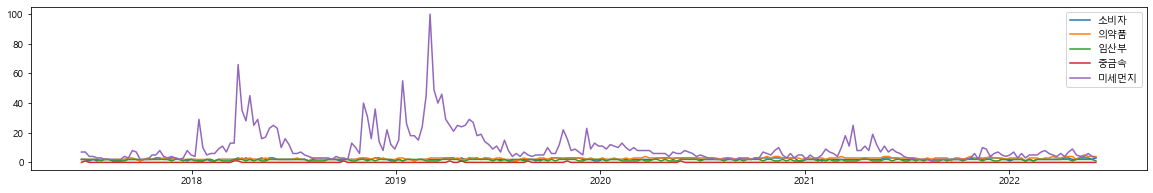

,환경부,가능성,식약처,후쿠시마,물티슈,isPartial
date,,,,,,
2017-06-18,14,16,15,18,8,False
2017-06-25,12,19,15,16,8,False
2017-07-02,12,13,17,15,12,False
2017-07-09,14,16,20,13,12,False
2017-07-16,16,12,20,24,6,False


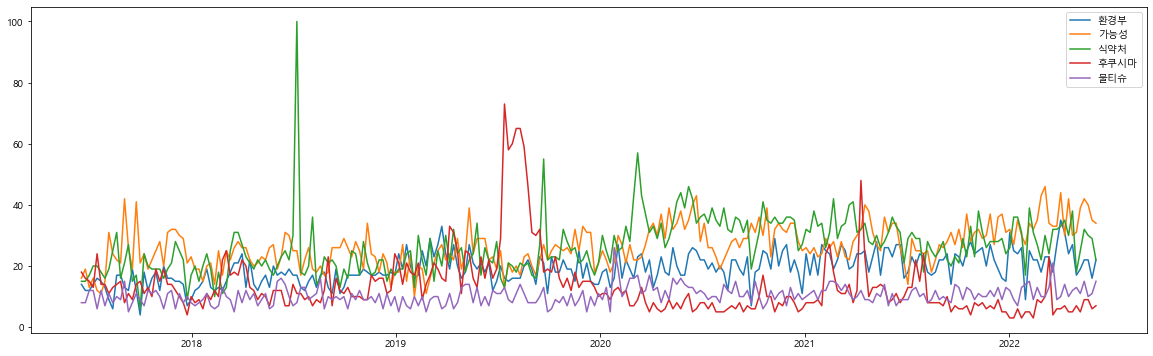

,자동차,곰팡이,폐기물,건강기능식품,연구원,isPartial
date,,,,,,
2017-06-18,81,3,3,1,13,False
2017-06-25,73,3,3,1,12,False
2017-07-02,79,4,2,1,12,False
2017-07-09,77,5,3,1,12,False
2017-07-16,71,5,3,1,12,False


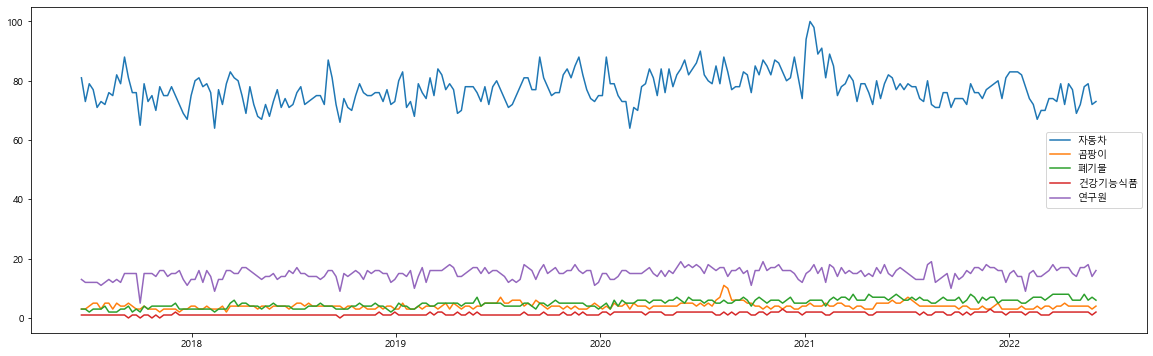

,온라인,화장품,발암물질,농산물,주민들,isPartial
date,,,,,,
2017-06-18,5,1,0,0,0,False
2017-06-25,5,1,0,0,0,False
2017-07-02,5,1,0,0,0,False
2017-07-09,5,1,0,0,0,False
2017-07-16,6,1,0,0,0,False


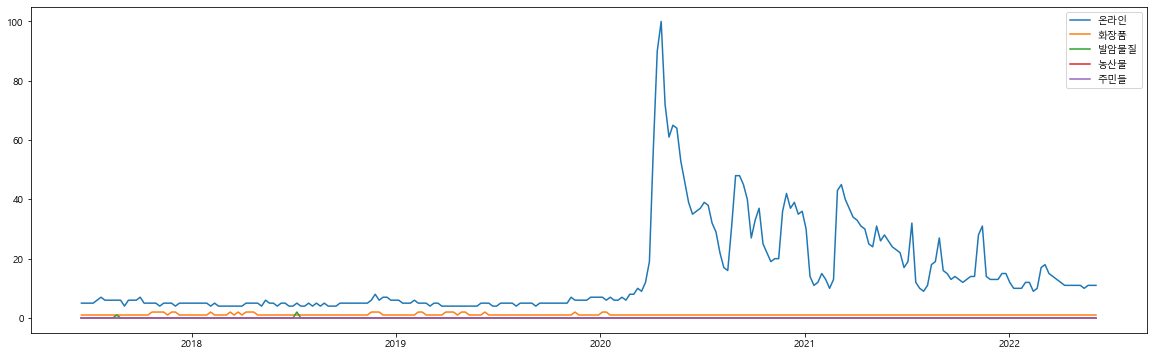

In [203]:
plt.figure(figsize=(20,3))
for i in range(1, 5):
    pytrends.build_payload(kw_list[(i-1)*5:i*5], timeframe='today 5-y', geo='KR')

    # store interest over time information in df
    df = pytrends.interest_over_time()
    df.head()
    # plot all five trends in same chart
    plt.plot(df.index, df[df.columns[0]])
    plt.plot(df.index, df[df.columns[1]])
    plt.plot(df.index, df[df.columns[2]])
    plt.plot(df.index, df[df.columns[3]])
    plt.plot(df.index, df[df.columns[4]])
    plt.legend(df.columns)
    plt.show()

In [185]:


pytrends.build_payload(kw_list[:5], timeframe='today 5-y', geo='KR')

# store interest over time information in df
df = pytrends.interest_over_time()
df.head()

,소비자,의약품,임산부,중금속,미세먼지,isPartial
date,,,,,,
2017-06-18,2,2,2,0,7,False
2017-06-25,2,2,2,1,7,False
2017-07-02,1,2,2,0,4,False
2017-07-09,2,2,2,0,4,False
2017-07-16,1,2,2,0,3,False


<Figure size 1440x216 with 0 Axes>

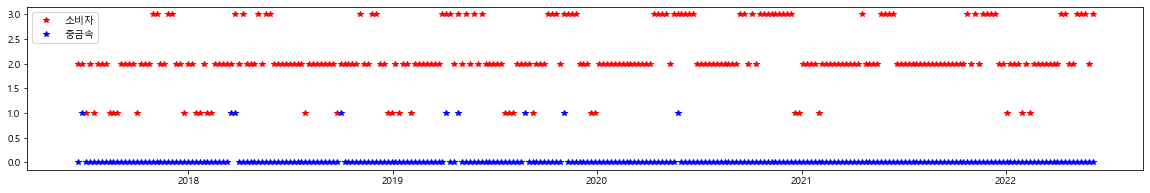

In [186]:
# plot all three trends in same chart
plt.figure(figsize=(20,3))
plt.plot(df.index,df.소비자,'r*')
plt.plot(df.index,df.중금속,'b*')
plt.legend(["소비자", "중금속"])

## 단어 빈도수 확인

### df['키워드']는 단어 수가 176,392,820개
- df['특성추출(가중치순 상위 50개)']단어 개수는 90%가 줄어듬 : 16,620,137개

In [75]:
words = []
for i in df['특성추출(가중치순 상위 50개)']:
    words.extend(str(i).split(','))
    
print('unique words : ',len(set(words)))
print('total words :',len(words))

unique words :  735791
total words : 16620133


In [76]:
words[:10]

['도시농업', '중랑구', '강서구', '중랑천', '체험장', '서울시', '오곡텃밭농장', '청남공원', '친환경', '구청장']

In [79]:
from collections import Counter
# Most Common 20 Words
Counter(words).most_common(20)

[('코로나19', 164466),
 ('미국', 104224),
 ('관계자', 88834),
 ('서울', 67604),
 ('한국', 65909),
 ('소비자', 57442),
 ('일본', 47443),
 ('코로나', 47050),
 ('온라인', 46129),
 ('의약품', 43642),
 ('만큼', 43094),
 ('중국', 42100),
 ('확진자', 40779),
 ('위원회', 38073),
 ('전문가', 38065),
 ('농산물', 35961),
 ('식약처', 35940),
 ('가능성', 30002),
 ('ai', 28005),
 ('코로나바이러스', 27662)]

In [78]:
len(words)
len(set(words))

16620133

735791

In [80]:
c = Counter(words)
c.most_common()[0:10]

[('코로나19', 164466),
 ('미국', 104224),
 ('관계자', 88834),
 ('서울', 67604),
 ('한국', 65909),
 ('소비자', 57442),
 ('일본', 47443),
 ('코로나', 47050),
 ('온라인', 46129),
 ('의약품', 43642)]

In [81]:
mylist=[]
for i in c.most_common()[0:10]:
    if i[1] > 1:
        mylist.append(i)
mylist

[('코로나19', 164466),
 ('미국', 104224),
 ('관계자', 88834),
 ('서울', 67604),
 ('한국', 65909),
 ('소비자', 57442),
 ('일본', 47443),
 ('코로나', 47050),
 ('온라인', 46129),
 ('의약품', 43642)]

# 단어출현빈도가 1개 이상인 단어만 추출

In [82]:
mylist_more_one = [i for i in list(c.items()) if i[1] > 1] # Couter현태의 사전형자료를 리스트로 변환하여 
mylist_more_one[:10]
len(mylist_more_one)

[('도시농업', 246),
 ('중랑구', 452),
 ('강서구', 1287),
 ('중랑천', 119),
 ('체험장', 615),
 ('서울시', 13394),
 ('오곡텃밭농장', 6),
 ('청남공원', 7),
 ('친환경', 10682),
 ('구청장', 3902)]

455715

In [83]:
data = pd.DataFrame(mylist_more_one, columns=['출현단어', '출현빈도']).sort_values('출현빈도', ascending=False)
data['선택'] = 0
data

,출현단어,출현빈도,선택
154,코로나19,164466,0
297,미국,104224,0
79,관계자,88834,0
16,서울,67604,0
274,한국,65909,0
...,...,...,...
290005,결핵예방,2,0
290008,108번,2,0
290011,전승훈,2,0
290013,울트라스트렝스,2,0


In [85]:
data[0:50000].to_excel('../data/출현단어_5만.xlsx')
data[50000:100000].to_excel('../data/출현단어_10만.xlsx')
data[100000:150000].to_excel('../data/출현단어_15만.xlsx')
data[150000:200000].to_excel('../data/출현단어_20만.xlsx')

data[200000:350000].to_excel('../data/출현단어_35만.xlsx')
data[35000:460000].to_excel('../data/출현단어_46만.xlsx')

In [84]:
data['출현빈도'].mean()
data['출현빈도'].mode()

35.855868250990206

0    2
Name: 출현빈도, dtype: int64

In [14]:
### 동일한 기능 nltk

In [85]:
import nltk
fdist = nltk.FreqDist(words)

In [86]:
fdist.max()
fdist.N()
#fdist.most_common()
fdist.most_common(20)
fdist[fdist.max()]

'코로나19'

16620133

[('코로나19', 164466),
 ('미국', 104224),
 ('관계자', 88834),
 ('서울', 67604),
 ('한국', 65909),
 ('소비자', 57442),
 ('일본', 47443),
 ('코로나', 47050),
 ('온라인', 46129),
 ('의약품', 43642),
 ('만큼', 43094),
 ('중국', 42100),
 ('확진자', 40779),
 ('위원회', 38073),
 ('전문가', 38065),
 ('농산물', 35961),
 ('식약처', 35940),
 ('가능성', 30002),
 ('ai', 28005),
 ('코로나바이러스', 27662)]

164466

In [30]:
pd.DataFrame(words)[: 80000].to_excel('../output/words1.xlsx')
pd.DataFrame(words)[80000: 160000].to_excel('../output/words2.xlsx')
pd.DataFrame(words)[160000: 164467].to_excel('../output/words3.xlsx')

<AxesSubplot:xlabel='0'>

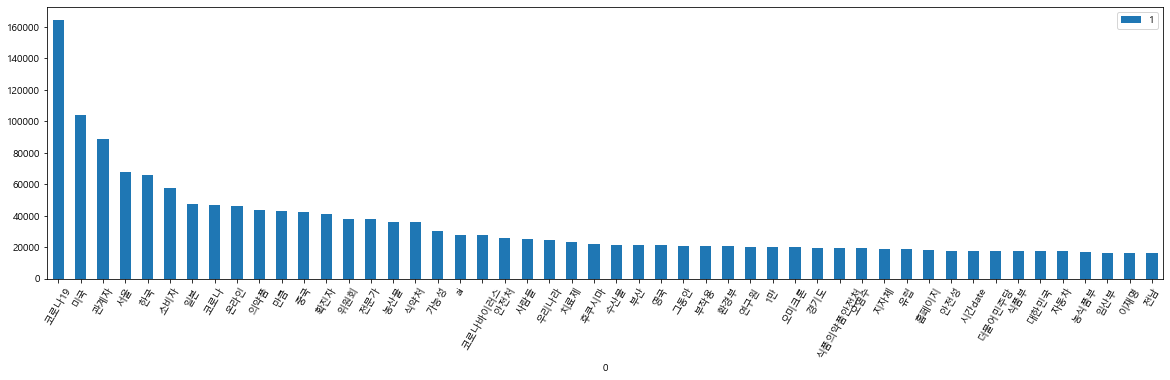

In [87]:
pd.DataFrame(fdist.most_common(50)).set_index(0).plot(kind='bar', rot=60, figsize=(20,5))

In [16]:
fdist.plot(cumulative=True)

AttributeError: 'list' object has no attribute 'plot'

- https://www.kaggle.com/code/ahmedmsoliman/82-accuracy

In [88]:
from nltk.corpus import stopwords
from nltk import ngrams

## 코로나 전후로 확인

# 통합분류 항목
## 을 묶어 coutervector로 빈도 수 시각화

In [89]:
df['분류'] = df['통합 분류1'] + '>' + df['통합 분류2'] + '>' + df['통합 분류3']
df.head()

,일자,언론사,통합 분류1,통합 분류2,통합 분류3,특성추출(가중치순 상위 50개),분류
8,2022-02-28,아시아경제,지역>경남,지역>전북,지역>충남,"도시농업,중랑구,강서구,중랑천,체험장,서울시,오곡텃밭농장,청남공원,친환경,구청장,도...",지역>경남> 지역>전북> 지역>충남
44,2022-02-23,대전일보,지역>전북,지역>충북,지역>충남,"농산물,서산시,농업인,농업환경분석센터,김갑식,농작물,분석의뢰서,재배지,액비,의뢰서,...",지역>전북> 지역>충북> 지역>충남
52,2022-02-23,충청일보,지역>전북,지역>충북,지역>대전,"농산물,서산시,320가지,잔류농약,농업인,충남,농업환경분석센터,김갑식,확보주,분석의...",지역>전북> 지역>충북> 지역>대전
55,2022-02-23,부산일보,경제>무역,경제>유통,경제>자동차,"농산물,신선농산물,진주시,신선,일본,진주,팬데믹,478ha,태국,베트남,파프리카,지역산",경제>무역> 경제>유통> 경제>자동차
61,2022-02-22,대전일보,지역>충남,경제>유통,지역>전북,"100억,청양,먹거리위원회,농산물,위원회,푸드플랜,대한민국,납품처,대치면,만큼,소비...",지역>충남> 경제>유통> 지역>전북


In [90]:
corpus = []
for x in df['분류']:
    tr = lambda x : str(x).replace(">"," ")
    corpus.append(tr(x))

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
    
data = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
data.head()

,it_과학,it_과학일반,nan,강원,경기,경남,경북,경제,경제일반,골프,...,충남,충북,취업_창업,콘텐츠,학술_문화재,한국프로야구,한국프로축구,해외축구,행정_자치,환경
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

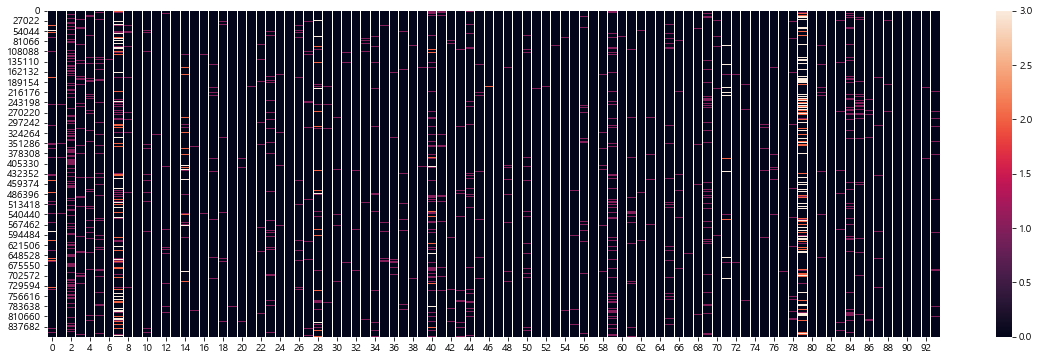

In [10]:
sns.heatmap(X.toarray())

## 소분류_통합분류 항목을 묶어 coutervector로 빈도 수 시각화

In [11]:
#df['통합 분류1'].apply(lambda x : str(x).split('>')[0])
genre_1 = df['통합 분류1'].apply(lambda x : str(x).split('>')[-1])
#df['통합 분류2'].apply(lambda x : str(x).split('>')[0])
genre_2 = df['통합 분류2'].apply(lambda x : str(x).split('>')[-1])
#df['통합 분류3'].apply(lambda x : str(x).split('>')[0])
genre_3 = df['통합 분류3'].apply(lambda x : str(x).split('>')[-1])
genre = set(genre_1.values) or set(genre_2.values) or set(genre_3.values)
len(genre)

86

In [12]:
new_col = data.columns[data.columns.isin(genre)]

In [13]:
data[new_col]

,강원,경기,경남,경북,경제일반,골프,과학,광주,교육_시험,국가대표팀,...,충남,충북,취업_창업,콘텐츠,학술_문화재,한국프로야구,한국프로축구,해외축구,행정_자치,환경
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
864684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
864685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
864686,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

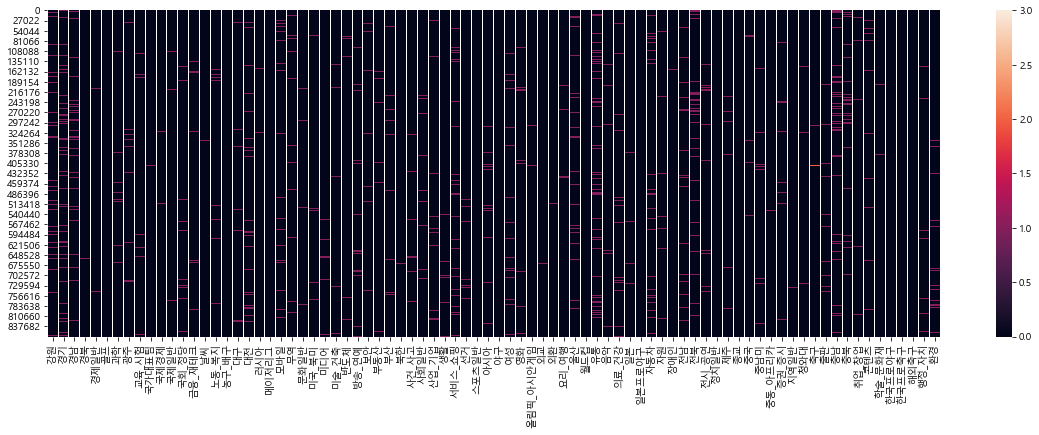

In [14]:
sns.heatmap(data[new_col])

## 대분류_통합분류 항목을 묶어 coutervector로 빈도 수 시각화

In [15]:
new_col = data.columns[~data.columns.isin(genre)]

In [16]:
data[new_col]

,it_과학,it_과학일반,nan,경제,국제,문화,사회,스포츠,유럽_eu,인터넷_sns,정치,지역
0,0,0,0,1,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,1,0,0,0,0,2
3,0,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
864683,0,0,0,0,0,2,1,0,0,0,0,0
864684,0,0,0,0,0,2,1,0,0,0,0,0
864685,0,0,0,2,0,0,0,0,0,0,0,1
864686,0,0,0,0,0,0,0,0,0,0,0,3


<AxesSubplot:>

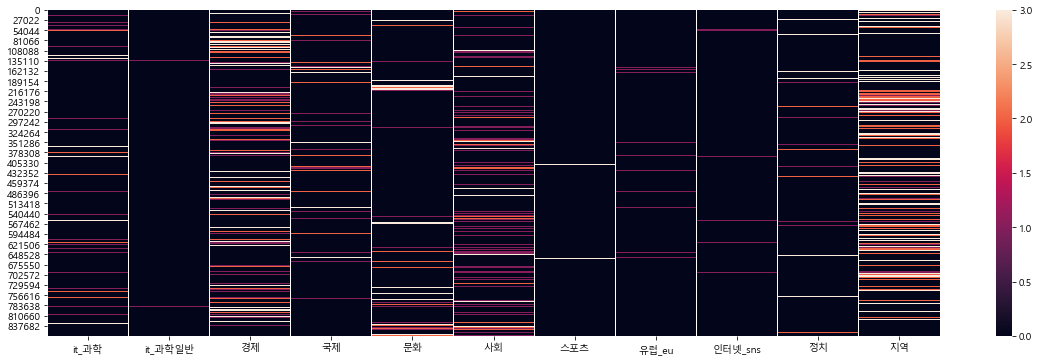

In [17]:
sns.heatmap(data[new_col].drop('nan', axis=1))

## 글로벌정보부 검색어

In [2]:
wb = pd.ExcelFile('D:/기본과제/(글로벌정보부)국내정보 검색어 목록.xlsx')
keywords = set()
for sheet in wb.sheet_names:
    words = pd.read_excel(wb, sheet_name = sheet, header=None)[0].unique()
    keywords.update(words)

In [3]:
len(keywords)
keywords

109

{'(잔류)농약',
 '2-CE',
 '2-클로로에탄올',
 'AI',
 'AI(조류인플루엔자)',
 'BPA',
 'BSE',
 'BSE(광우병)',
 'E.coli',
 'GM (유전자변형)',
 'GMO',
 'IAEA+일본',
 '건강기능식품',
 '검사/조사',
 '검출',
 '곰팡이',
 '곰팡이독소',
 '광우병',
 '금지',
 '급식',
 '기생충',
 '나무젓가락',
 '냅킨',
 '농림축산식품부',
 '농산물',
 '농식품부',
 '농약',
 '다이옥신',
 '대장균',
 '동물용의약품',
 '리스테리아',
 '먹는물',
 '먹는물(생수)',
 '멜라민',
 '물티슈',
 '발생',
 '발암',
 '발암(물질)',
 '방사능',
 '방사성',
 '부작용',
 '불량식품',
 '비스페놀',
 '비스페놀A',
 '빨대',
 '사망',
 '살모넬라',
 '생수',
 '세척제',
 '수산물',
 '수의약품',
 '수의약품(동물용의약품)',
 '식약처',
 '식이요법',
 '식중독',
 '식품',
 '식품경보',
 '식품안전정보원',
 '식품알레르기',
 '식품의약품안전처',
 '식품접객업소용 물티슈',
 '안전(식품안전)',
 '알레르기',
 '에틸렌옥사이드',
 '오염',
 '오염(물질)',
 '위생',
 '위생(식품위생)',
 '위생물수건',
 '유아',
 '유전자변형',
 '의약품성분',
 '이력',
 '이력추적',
 '이물',
 '이쑤시개',
 '일본+오염수',
 '일회용 나이프',
 '일회용 빨대',
 '일회용 숟가락',
 '일회용 이쑤시개',
 '일회용 젓가락 ',
 '일회용 종이냅킨',
 '일회용 컵',
 '일회용 타월',
 '일회용 포크',
 '일회용 행주 ',
 '일회용나이프',
 '일회용종이컵',
 '일회용컵',
 '일회용타월',
 '일회용포크',
 '일회용행주',
 '임산부',
 '입원',
 '종이 ',
 '종이컵',
 '주류',
 '중금속',
 '첨가물',
 '추정사례',
 '축산물',
 '할랄',
 '항생제',
 '행주',


In [4]:
keywords = {'농약',
 '2-CE',
 '2-클로로에탄올',
 'AI',
 '조류인플루엔자',
 'BPA',
 'BSE',
 '광우병',
 'E.coli',
 'GM',
 '유전자변형',
 'GMO',
 'IAEA 일본',
 '건강기능식품',
 '검사 조사',
 '검출',
 '곰팡이',
 '곰팡이독소',
 '광우병',
 '금지',
 '급식',
 '기생충',
 '나무젓가락',
 '냅킨',
 '농림축산식품부',
 '농산물',
 '농식품부',
 '농약',
 '다이옥신',
 '대장균',
 '동물용의약품',
 '리스테리아',
 '먹는물',
 '먹는물'
 '생수',
 '멜라민',
 '물티슈',
 '발생',
 '발암',
 '발암물질',
 '방사능',
 '방사성',
 '부작용',
 '불량식품',
 '비스페놀',
 '비스페놀A',
 '빨대',
 '사망',
 '살모넬라',
 '생수',
 '세척제',
 '수산물',
 '수의약품',
 '동물용의약품',
 '식약처',
 '식이요법',
 '식중독',
 '식품',
 '식품경보',
 '식품안전정보원',
 '식품알레르기',
 '식품의약품안전처',
 '식품접객업소용 물티슈',
 '안전',
 '식품안전',
 '알레르기',
 '에틸렌옥사이드',
 '오염',
 '오염물질',
 '위생',
 '식품위생',
 '위생물수건',
 '유아',
 '유전자변형',
 '의약품성분',
 '이력',
 '이력추적',
 '이물',
 '이쑤시개',
 '일본 오염수',
 '일회용 나이프',
 '일회용 빨대',
 '일회용 숟가락',
 '일회용 이쑤시개',
 '일회용 젓가락 ',
 '일회용 종이냅킨',
 '일회용 컵',
 '일회용 타월',
 '일회용 포크',
 '일회용 행주 ',
 '일회용나이프',
 '일회용종이컵',
 '일회용컵',
 '일회용타월',
 '일회용포크',
 '일회용행주',
 '임산부',
 '입원',
 '종이 ',
 '종이컵',
 '주류',
 '중금속',
 '첨가물',
 '추정사례',
 '축산물',
 '할랄',
 '항생제',
 '행주',
 '헹굼보조제',
 '호르몬',
 '회수',
 '후쿠시마 물'}

In [8]:
','.join(keywords)
len(keywords)

'위생,행주,일회용행주,식품접객업소용 물티슈,유아,일회용나이프,부작용,BSE,농림축산식품부,발암,식품의약품안전처,식품,헹굼보조제,일회용 빨대,불량식품,다이옥신,농식품부,검사 조사,일회용종이컵,이물,종이컵,멜라민,할랄,일회용 포크,수산물,물티슈,중금속,생수,이력추적,안전,일회용 이쑤시개,먹는물생수,나무젓가락,급식,IAEA 일본,동물용의약품,검출,광우병,일회용포크,사망,종이 ,농산물,곰팡이독소,오염,일회용 숟가락,후쿠시마 물,조류인플루엔자,GM,주류,일회용컵,AI,첨가물,식품경보,회수,리스테리아,식품위생,빨대,이력,2-CE,오염물질,일회용 젓가락 ,위생물수건,GMO,세척제,식품안전정보원,냅킨,임산부,입원,살모넬라,일본 오염수,방사능,방사성,일회용 컵,먹는물,일회용 종이냅킨,발생,비스페놀,축산물,비스페놀A,에틸렌옥사이드,식품안전,건강기능식품,농약,대장균,일회용 타월,일회용 나이프,알레르기,유전자변형,수의약품,추정사례,식이요법,일회용 행주 ,의약품성분,BPA,곰팡이,이쑤시개,식약처,식중독,금지,식품알레르기,항생제,2-클로로에탄올,호르몬,발암물질,E.coli,기생충,일회용타월'

107

In [98]:
df['특성추출(가중치순 상위 50개)']

8         도시농업,중랑구,강서구,중랑천,체험장,서울시,오곡텃밭농장,청남공원,친환경,구청장,도...
44        농산물,서산시,농업인,농업환경분석센터,김갑식,농작물,분석의뢰서,재배지,액비,의뢰서,...
52        농산물,서산시,320가지,잔류농약,농업인,충남,농업환경분석센터,김갑식,확보주,분석의...
55         농산물,신선농산물,진주시,신선,일본,진주,팬데믹,478ha,태국,베트남,파프리카,지역산
61        100억,청양,먹거리위원회,농산물,위원회,푸드플랜,대한민국,납품처,대치면,만큼,소비...
                                ...                        
864680    제수용,원산지,보조금,정보공개,부정수급,경찰청,사제총기,보상금액,사업관리,추진단,안...
864682    꼬르따사르,재오,마술사,지도교수,듯이,말라르메,시간강사,포니테일,그리스어,모히토,손...
864683    박신영,여자들,보형물,간호사,확대술,핸드폰,오마담,혜진,코히시브,목구멍,사람들,성냥...
864684    박신영,여자들,보형물,간호사,확대술,핸드폰,오마담,혜진,코히시브,목구멍,사람들,성냥...
864685    원산지,소비자,공무원,감시원,식품부,해양수산부,전통시장,행정처분,휴게소,농림축산식품...
Name: 특성추출(가중치순 상위 50개), Length: 791810, dtype: object

In [99]:
df

,일자,언론사,통합 분류1,통합 분류2,통합 분류3,특성추출(가중치순 상위 50개),분류
8,2022-02-28,아시아경제,지역>경남,지역>전북,지역>충남,"도시농업,중랑구,강서구,중랑천,체험장,서울시,오곡텃밭농장,청남공원,친환경,구청장,도...",지역>경남> 지역>전북> 지역>충남
44,2022-02-23,대전일보,지역>전북,지역>충북,지역>충남,"농산물,서산시,농업인,농업환경분석센터,김갑식,농작물,분석의뢰서,재배지,액비,의뢰서,...",지역>전북> 지역>충북> 지역>충남
52,2022-02-23,충청일보,지역>전북,지역>충북,지역>대전,"농산물,서산시,320가지,잔류농약,농업인,충남,농업환경분석센터,김갑식,확보주,분석의...",지역>전북> 지역>충북> 지역>대전
55,2022-02-23,부산일보,경제>무역,경제>유통,경제>자동차,"농산물,신선농산물,진주시,신선,일본,진주,팬데믹,478ha,태국,베트남,파프리카,지역산",경제>무역> 경제>유통> 경제>자동차
61,2022-02-22,대전일보,지역>충남,경제>유통,지역>전북,"100억,청양,먹거리위원회,농산물,위원회,푸드플랜,대한민국,납품처,대치면,만큼,소비...",지역>충남> 경제>유통> 지역>전북
...,...,...,...,...,...,...,...
864680,2017-01-02,MBC,미분류,NaN,NaN,"제수용,원산지,보조금,정보공개,부정수급,경찰청,사제총기,보상금액,사업관리,추진단,안...",NaN
864682,2017-01-02,세계일보,문화>방송_연예,문화>생활,문화>출판,"꼬르따사르,재오,마술사,지도교수,듯이,말라르메,시간강사,포니테일,그리스어,모히토,손...",문화>방송_연예> 문화>생활> 문화>출판
864683,2017-01-02,경인일보,문화>생활,문화>방송_연예,사회>의료_건강,"박신영,여자들,보형물,간호사,확대술,핸드폰,오마담,혜진,코히시브,목구멍,사람들,성냥...",문화>생활> 문화>방송_연예> 사회>의료_건강
864684,2017-01-02,경인일보,문화>생활,문화>방송_연예,사회>의료_건강,"박신영,여자들,보형물,간호사,확대술,핸드폰,오마담,혜진,코히시브,목구멍,사람들,성냥...",문화>생활> 문화>방송_연예> 사회>의료_건강


In [101]:
import re

def food_type (search_text) :
    for i, text in enumerate(df['특성추출(가중치순 상위 50개)']) :
        if search_text in regex.findall(str(text)) :
            df.loc[i,search_text] = 1 # '1'대신 단어출현빈도인 len(regex.findall(text))

for search_text in tqdm_notebook(keywords) :
    regex=re.compile(search_text)
    df[search_text] = 0
    food_type (search_text)

  0%|          | 0/107 [00:00<?, ?it/s]

In [102]:
df.to_pickle('D:/기본과제/output/a.pkl')

In [103]:
import os
import time
import numpy as np
from datetime import datetime

# sleeping during (go time minus now time) & shut down
now = datetime.now()
go = datetime(2022, now.month, now.day, 
              18, 
              (50 + np.random.randint(1, 11)), 
              np.random.randint(1, 59))

sleeping = (go - now).total_seconds()

print(sleeping)

2858.49367


In [ ]:
shutdown = True

if shutdown:
    time.sleep(sleeping)
    os.system("shutdown /s /t 1")
else:
    print('Shutdown is not requested')

In [62]:
df[keywords]

,조류인플루엔자,농약,AI
8,0.0,0.0,0
44,0.0,0.0,0
52,0.0,0.0,0
55,0.0,1.0,0
61,0.0,1.0,0
...,...,...,...
709895,NaN,1.0,0
709991,NaN,1.0,0
777121,NaN,1.0,0
783309,NaN,1.0,0


In [63]:
df['특성추출(가중치순 상위 50개)']

8         도시농업,중랑구,강서구,중랑천,체험장,서울시,오곡텃밭농장,청남공원,친환경,구청장,도...
44        농산물,서산시,농업인,농업환경분석센터,김갑식,농작물,분석의뢰서,재배지,액비,의뢰서,...
52        농산물,서산시,320가지,잔류농약,농업인,충남,농업환경분석센터,김갑식,확보주,분석의...
55         농산물,신선농산물,진주시,신선,일본,진주,팬데믹,478ha,태국,베트남,파프리카,지역산
61        100억,청양,먹거리위원회,농산물,위원회,푸드플랜,대한민국,납품처,대치면,만큼,소비...
                                ...                        
709895                                                  NaN
709991                                                  NaN
777121                                                  NaN
783309                                                  NaN
783522                                                  NaN
Name: 특성추출(가중치순 상위 50개), Length: 795632, dtype: object

In [9]:
stop_words_01 = pd.read_excel(r'D:\자료\2020기본과제\naver\data' + '/Add_stop_words_20200317.xlsx')['Add_stop_words'].tolist()

data = pd.read_excel(r'D:\자료\2020기본과제\naver\data' + '/naver_stopword_02.xlsx')
stop_words_02 = data[data['불용어 여부'] == 1]['불용어 여부'].tolist()

data = pd.read_excel(r'D:\자료\2020기본과제\naver\data' + '/select_cho.xlsx')
stop_words_03 = data[data['choice'] == 1]['choice'].tolist()

stop_words = list(set(set(stop_words_01) | set(stop_words_02) | set(stop_words_03)))
len(stop_words)

463

In [37]:
data = df[:5]
import re

def brush_clean (regex) :
    
    #print('청소전', data.head(3))
    for pattern_string in tqdm_notebook(regex) :
        pattern = re.compile(pattern_string)
        data['키워드'] = data['키워드'].apply(lambda x : re.sub(pattern, '', str(x)))
    
    data['키워드'] = data['키워드'].apply(lambda x : "".join(x.replace("\n"," ")))
        
    return data['키워드']

In [38]:
data

,일자,언론사,통합 분류1,통합 분류2,통합 분류3,키워드,특성추출(가중치순 상위 50개),본문
8,2022-02-28,아시아경제,지역>경남,지역>전북,지역>충남,"도심,도심,자연,힐링,중랑구,도시,농업,복합,공간,착공,서울시,자치구,중랑구,30억...","도시농업,중랑구,강서구,중랑천,체험장,서울시,오곡텃밭농장,청남공원,친환경,구청장,도...",[아시아경제 박종일 기자] 중랑구(구청장 류경기)가 지난 25일 청남공원 내에 도시...
44,2022-02-23,대전일보,지역>전북,지역>충북,지역>충남,"서산시,농산물,잔류,농약,연중,무료,가지,4월,가지,지원,서산,충남,서산시,수요,안...","농산물,서산시,농업인,농업환경분석센터,김갑식,농작물,분석의뢰서,재배지,액비,의뢰서,...",[서산]충남 서산시가 높아지는 안전 농산물 수요에 발맞춰 농산물 잔류농약 분석을 무...
52,2022-02-23,충청일보,지역>전북,지역>충북,지역>대전,"서산시,농산물,잔류농약,잔류,농약,연중,무료,지역,농산물,확보주,320가지,가지,충...","농산물,서산시,320가지,잔류농약,농업인,충남,농업환경분석센터,김갑식,확보주,분석의...","믿고 먹을 수 있는 지역 농산물 확보주 5일, 320가지 분석 충남 서산시가 높아..."
55,2022-02-23,부산일보,경제>무역,경제>유통,경제>자동차,"팬데믹,수출,진주시,농산물,역대,최고,해외,달러,어치,신선,농산물,전년,19%,증가...","농산물,신선농산물,진주시,신선,일본,진주,팬데믹,478ha,태국,베트남,파프리카,지역산",진주 수출용 딸기 선별과 포장 모습. 진주시 제공\n\n\n\n 코로나19 팬데믹 ...
61,2022-02-22,대전일보,지역>충남,경제>유통,지역>전북,"청양,푸드,플랜,먹거리위원회,제도적,마련,소비시장,창출,논의,청양,청양군,지속,가능...","100억,청양,먹거리위원회,농산물,위원회,푸드플랜,대한민국,납품처,대치면,만큼,소비...",[청양]청양군이 지속 가능한 먹거리 생산유통체계 구성을 위해 먹거리 위원회를 구성하...


In [43]:
stop_words = ['중랑구', '서산시', '진주시', '먹거리위원회']
stop_words
brush_clean (stop_words)

['중랑구', '서산시', '진주시', '먹거리위원회']

  0%|          | 0/4 [00:00<?, ?it/s]

8     도심,도심,자연,힐링,,도시,농업,복합,공간,착공,서울시,자치구,,30억,투자,신내...
44    ,농산물,잔류,농약,연중,무료,가지,4월,가지,지원,서산,충남,,수요,안전,농산물,...
52    ,농산물,잔류농약,잔류,농약,연중,무료,지역,농산물,확보주,320가지,가지,충남,,...
55    팬데믹,수출,,농산물,역대,최고,해외,달러,어치,신선,농산물,전년,19%,증가,역대...
61    청양,푸드,플랜,,제도적,마련,소비시장,창출,논의,청양,청양군,지속,가능,구성,먹거...
Name: 키워드, dtype: object

In [70]:
pd.DataFrame(stop_words).sort_values(0).dropna()[0].to_list()
#.remove['(구)농축수산물안전국',  '(구)식품안전정책국',  '(구)식품영양안전국',  '-',  '178(삼평동,']

['(구)농축수산물안전국',
 '(구)식품안전정책국',
 '(구)식품영양안전국',
 '-',
 '178(삼평동,',
 '가능',
 '가운데',
 '가장',
 '가평군',
 '갈매로',
 '강남구',
 '강동구',
 '강릉시',
 '강북구',
 '강서구',
 '강원도',
 '강진군',
 '강화군',
 '거제시',
 '거창군',
 '건강기능식품정책과',
 '검사기관협업부서',
 '결정',
 '경기',
 '경기도',
 '경산시',
 '경상남도',
 '경상북도',
 '경인청',
 '경제국',
 '경제산업국',
 '경제진흥본부',
 '경제통상국',
 '경주시',
 '계룡시',
 '계양구',
 '고령군',
 '고성군',
 '고양시',
 '고자',
 '고창군',
 '고함',
 '고흥군',
 '곡성군',
 '공장',
 '공주시',
 '과정',
 '과천시',
 '과학경제국',
 '관련',
 '관악구',
 '관악구신림동',
 '광명시',
 '광산구',
 '광양시',
 '광주광역시',
 '광주시',
 '광주청',
 '광진구',
 '괴산군',
 '구례군',
 '구로구',
 '구로동',
 '구리시',
 '구매',
 '구미시',
 '구입',
 '군량골길',
 '군산시',
 '군위군',
 '군포시',
 '근무',
 '금남면',
 '금산군',
 '금정구',
 '금천구',
 '기관',
 '기자',
 '기장군',
 '김제시',
 '김천시',
 '김포시',
 '김해시',
 '까지',
 '나리3로',
 '나주시',
 '나타',
 '남구',
 '남동구',
 '남세종로',
 '남양주시',
 '남원시',
 '남해군',
 '내용',
 '노원구',
 '논산시',
 '농림식품국',
 '농림축산국',
 '농림축산식품국',
 '농정국',
 '농축 수산물',
 '농축산식품국',
 '농축산유통국',
 '농축수산물안전과',
 '농축수산식품국',
 '닌지',
 '다가',
 '다른',
 '다시',
 '단양군',
 '달빛로',
 '달서구',
 '달성군',
 '담당자',
 '담양군',
 '답변',
 '당산로',
 '당진군

In [55]:
stop_words = list(set(set(stop_words_01) | set(stop_words_02) | set(stop_words_03)))
stop_words[:5]
stop_words.remove(1)
stop_words[:5]
stop_words.remove(nan)
stop_words[:5]
brush_clean (stop_words[2:])

['경상북도', nan, 1, '대전광역시', '장기로']

['경상북도', nan, '대전광역시', '장기로', '청송군']

NameError: name 'nan' is not defined